
### 1. 导入模块

In [10]:
import timm
import torch
import torchvision
from PIL import Image
from torchvision import transforms as T
import json


### 2. 输入EDA

In [12]:
image = Image.open('./house_finch.jpg')

In [13]:
print(type(image), image.mode, image.format, image.size, image.getbands())

<class 'PIL.JpegImagePlugin.JpegImageFile'> RGB JPEG (480, 360) ('R', 'G', 'B')


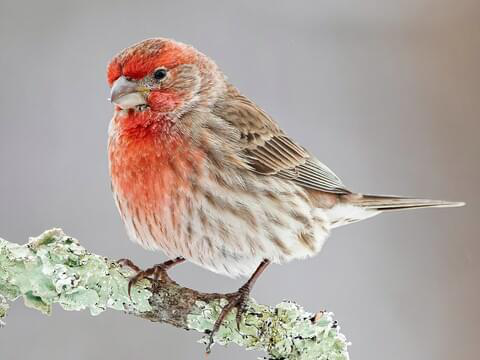

In [14]:
image

### 3. 输入预处理

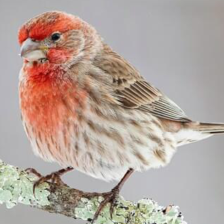

In [23]:
T.Compose([T.Resize(256), T.CenterCrop(224)])(image)

In [26]:
print(timm.data.IMAGENET_DEFAULT_MEAN, timm.data.IMAGENET_DEFAULT_STD)

(0.485, 0.456, 0.406) (0.229, 0.224, 0.225)


In [27]:
trans_ = T.Compose([T.Resize(256), 
                    T.CenterCrop(224), 
                    T.ToTensor(), 
                    T.Normalize(timm.data.IMAGENET_DEFAULT_MEAN, timm.data.IMAGENET_DEFAULT_STD)])

In [36]:
transed_input = trans_(image)

In [29]:
print(type(transed_input), transed_input.shape)

<class 'torch.Tensor'> torch.Size([3, 224, 224])


In [37]:
batch_input = transed_input.unsqueeze(0)

In [38]:
batch_input.shape

torch.Size([1, 3, 224, 224])

### 4. 模型

In [15]:
timm.list_models('swin*')

['swin_base_patch4_window7_224',
 'swin_base_patch4_window7_224_in22k',
 'swin_base_patch4_window12_384',
 'swin_base_patch4_window12_384_in22k',
 'swin_large_patch4_window7_224',
 'swin_large_patch4_window7_224_in22k',
 'swin_large_patch4_window12_384',
 'swin_large_patch4_window12_384_in22k',
 'swin_small_patch4_window7_224',
 'swin_tiny_patch4_window7_224']

In [16]:
model = timm.create_model('swin_base_patch4_window7_224', pretrained=True)

/Users/chunhuizhang/anaconda3/lib/python3.6/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [21]:
model

SwinTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
    (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (layers): Sequential(
    (0): BasicLayer(
      dim=128, input_resolution=(56, 56), depth=2
      (blocks): ModuleList(
        (0): SwinTransformerBlock(
          (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
          (attn): WindowAttention(
            (qkv): Linear(in_features=128, out_features=384, bias=True)
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=128, out_features=128, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
            (softmax): Softmax(dim=-1)
          )
          (drop_path): Identity()
          (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_features=128, out_features=512, bias=True)
     

### 5. 推理及预测过程

In [39]:
with torch.no_grad():
    output = model(batch_input)

In [41]:
output.shape

torch.Size([1, 1000])

In [43]:
output.sum(dim=1)

tensor([27.4846])

In [44]:
output.argmax()

tensor(12)

In [47]:
from torch import nn

In [49]:
nn.Softmax(dim=1)(output).max()

tensor(0.8581)

In [50]:
torch.topk(nn.Softmax(dim=1)(output), 3)

torch.return_types.topk(
values=tensor([[0.8581, 0.0190, 0.0013]]),
indices=tensor([[12, 10, 86]]))

### 6. 输出解析

In [45]:
with open('./imagenet_labels.json') as f:
    labels = json.load(f)

In [46]:
labels[output.argmax()]

'house finch'

In [52]:
labels[86]

'partridge'